<a href="https://colab.research.google.com/github/jepowo/CPE_313/blob/main/cpe313_HOA1p2_Training_Neural_Networks_cpe32s8_DelaRosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:
# filepath = "pima-indians-diabetes.csv"
from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/My Drive/dataset/pima-indians-diabetes.csv'


names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Check the top 5 samples of the data

In [ ]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
650,1,91,54,25,100,25.2,0.234,23,0
408,8,197,74,0,0,25.9,1.191,39,1
272,3,122,78,0,0,23.0,0.254,40,0
147,2,106,64,35,119,30.5,1.400,34,0
755,1,128,88,39,110,36.5,1.057,37,1


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

In [ ]:
print(X.shape)
X

(768, 8)


array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
print(y.shape)
y

(768,)


array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:
model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:
len(model.layers)

2

View the model summary

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 12)                108       
                                                                 
 dense_11 (Dense)            (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:
model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

Epoch 1/200
18/18 [==============================] - 1s 19ms/step - loss: 0.6846 - accuracy: 0.6111 - val_loss: 0.6275 - val_accuracy: 0.6302
Epoch 2/200
18/18 [==============================] - 0s 6ms/step - loss: 0.6594 - accuracy: 0.6250 - val_loss: 0.6091 - val_accuracy: 0.6406
Epoch 3/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6379 - accuracy: 0.6615 - val_loss: 0.5937 - val_accuracy: 0.6510
Epoch 4/200
18/18 [==============================] - 0s 6ms/step - loss: 0.6196 - accuracy: 0.6667 - val_loss: 0.5807 - val_accuracy: 0.6771
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6041 - accuracy: 0.6753 - val_loss: 0.5697 - val_accuracy: 0.7031
Epoch 6/200
18/18 [==============================] - 0s 5ms/step - loss: 0.5908 - accuracy: 0.6944 - val_loss: 0.5602 - val_accuracy: 0.7135
Epoch 7/200
18/18 [==============================] - 0s 6ms/step - loss: 0.5792 - accuracy: 0.7031 - val_loss: 0.5521 - val_accuracy: 0.7240
Epoch 8/200


In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.
#
# y_pred_class_nn_1 = model.predict_classes(X_test_norm)
y_pred_class_nn_1 = (model.predict(X_test_norm) > 0.5).astype("int32")
# y_pred_class_nn_1 = np.argmax(model.predict(X_test_norm), axis=1)

y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 [==============================] - 0s 2ms/step


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.57113004],
       [0.565662  ],
       [0.310637  ],
       [0.18376544],
       [0.17019185],
       [0.4444157 ],
       [0.024828  ],
       [0.36225083],
       [0.95339745],
       [0.17365043]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

Evaluate the model performance and plot the ROC CURVE

In [ ]:
y_test

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0])

In [ ]:
y_pred_class_nn_1

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [ ]:
y_pred_prob_nn_1

array([[5.71130037e-01],
       [5.65662026e-01],
       [3.10636997e-01],
       [1.83765441e-01],
       [1.70191854e-01],
       [4.44415689e-01],
       [2.48279981e-02],
       [3.62250835e-01],
       [9.53397453e-01],
       [1.73650429e-01],
       [1.61885500e-01],
       [7.13533387e-02],
       [6.99699998e-01],
       [4.37074490e-02],
       [8.60502243e-01],
       [6.69682682e-01],
       [4.05974060e-01],
       [2.32877091e-01],
       [7.28196025e-01],
       [1.44554049e-01],
       [3.44109416e-01],
       [1.40968626e-02],
       [1.44714206e-01],
       [7.62878239e-01],
       [6.46985710e-01],
       [7.30103850e-01],
       [8.19693267e-01],
       [8.34810913e-01],
       [5.99085130e-02],
       [8.86303246e-01],
       [1.96762651e-01],
       [4.51143056e-01],
       [1.11813203e-01],
       [3.44946891e-01],
       [1.94703341e-01],
       [6.92940235e-01],
       [9.43637788e-01],
       [3.97061586e-01],
       [2.10833684e-01],
       [5.47887981e-01],


accuracy is 0.781
roc-auc is 0.824


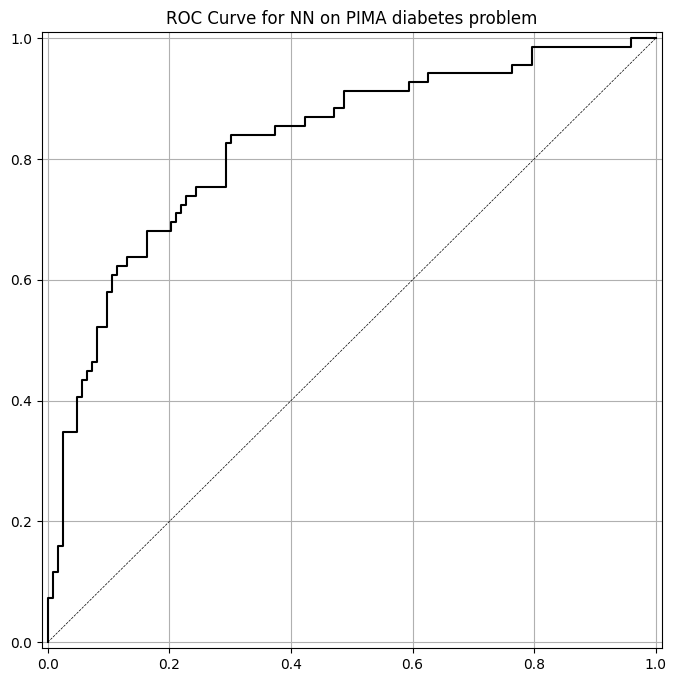

In [ ]:
# print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1.round())))
# print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1.round())))

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

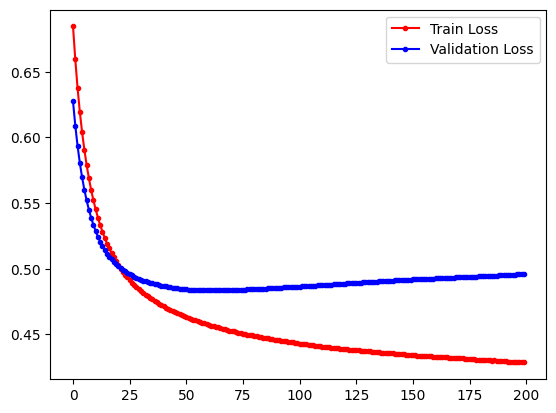

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

It appears that the training loss and validation loss both decrease over time which means that the model is learning from the training data and is improving its performance. But the validation loss is higher than the training loss.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [ ]:
modelA = Sequential([
    Dense(6, activation='relu'),
    Dense(6, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
modelA.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_A = modelA.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 [==============================] - 1s 13ms/step - loss: 0.6675 - accuracy: 0.6580 - val_loss: 0.6729 - val_accuracy: 0.6510
Epoch 2/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6613 - accuracy: 0.6580 - val_loss: 0.6683 - val_accuracy: 0.6510
Epoch 3/1500
18/18 [==============================] - 0s 3ms/step - loss: 0.6557 - accuracy: 0.6528 - val_loss: 0.6642 - val_accuracy: 0.6458
Epoch 4/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6528 - val_loss: 0.6604 - val_accuracy: 0.6458
Epoch 5/1500
18/18 [==============================] - 0s 3ms/step - loss: 0.6456 - accuracy: 0.6580 - val_loss: 0.6570 - val_accuracy: 0.6458
Epoch 6/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6410 - accuracy: 0.6580 - val_loss: 0.6538 - val_accuracy: 0.6510
Epoch 7/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6367 - accuracy: 0.6580 - val_loss: 0.6509 - val_accuracy: 0.6510
Epoch

In [ ]:
len(modelA.layers)

3

In [ ]:
y_pred_class_nn_A = (modelA.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_A = modelA.predict(X_test_norm)

6/6 [==============================] - 0s 2ms/step


In [ ]:
y_pred_class_nn_A[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [ ]:
y_pred_prob_nn_A[:10]

array([[0.5846946 ],
       [0.6460568 ],
       [0.46035126],
       [0.27379274],
       [0.09558823],
       [0.6729518 ],
       [0.01586329],
       [0.14297067],
       [0.9500153 ],
       [0.14618982]], dtype=float32)

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.776
roc-auc is 0.812


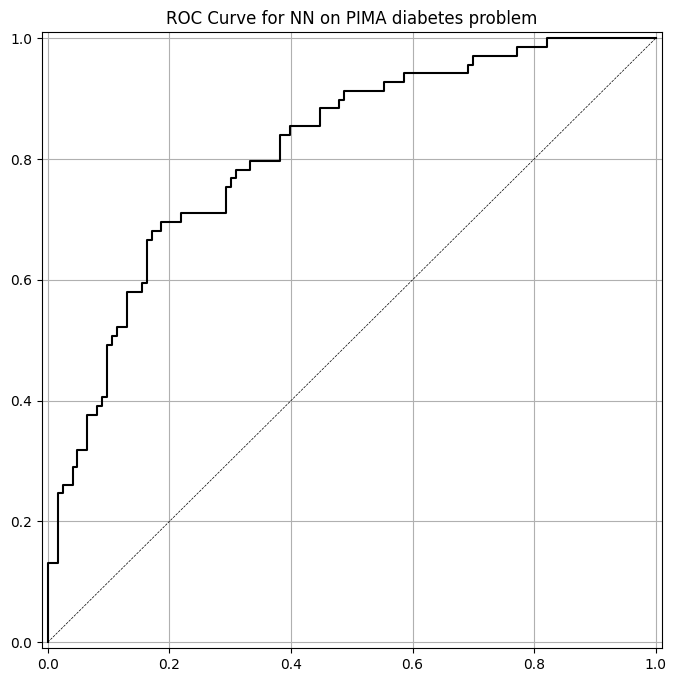

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_A)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_A)))

plot_roc(y_test, y_pred_prob_nn_A, 'NN')

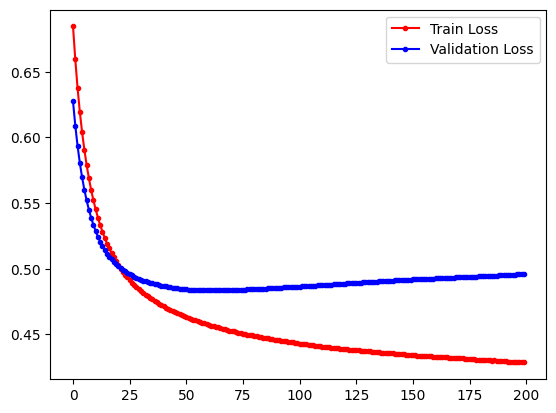

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()



---


In [ ]:
drive.mount('/content/drive')
filepath_wine = '/content/drive/My Drive/dataset/WineQT.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
wine_df = pd.read_csv(filepath_wine)

In [ ]:
wine_df.shape

(1143, 13)

In [ ]:
wine_df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
843,7.0,0.745,0.12,1.8,0.114,15.0,64.0,0.99588,3.22,0.59,9.5,6,1194
97,6.3,0.390,0.08,1.7,0.066,3.0,20.0,0.99540,3.34,0.58,9.4,5,143
727,10.1,0.370,0.34,2.4,0.085,5.0,17.0,0.99683,3.17,0.65,10.6,7,1035
982,7.1,0.755,0.15,1.8,0.107,20.0,84.0,0.99593,3.19,0.50,9.5,5,1384
803,10.4,0.520,0.45,2.0,0.080,6.0,13.0,0.99774,3.22,0.76,11.4,6,1136


In [ ]:
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [ ]:
wine_df.drop(['Id'], axis=1, inplace=True)

In [ ]:
X_wine = wine_df.drop(columns=['quality']).values
y_wine = (wine_df['quality'] > 5).astype(int).values

In [ ]:
print(X_wine.shape)
print(y_wine.shape)

(1143, 11)
(1143,)


In [ ]:
X_trainB, X_testB, y_trainB, y_testB = train_test_split(X_wine, y_wine, test_size=0.25, random_state=11111)

In [ ]:
normalizer_wine = StandardScaler()
X_train_normB = normalizer_wine.fit_transform(X_trainB)
X_test_normB = normalizer_wine.transform(X_testB)

In [ ]:
modelB = Sequential([
   Dense(8, input_shape=(11,), activation='relu'),
   Dense(4, activation='relu'),
   Dense(2, activation='relu'),
   Dense(1, activation='sigmoid')
])

In [ ]:
lrB = 0.016
epocB = 1200

In [ ]:
modelB.compile(SGD(lr = lrB), "binary_crossentropy", metrics=["accuracy"])
run_hist_B = modelB.fit(X_train_normB, y_trainB, validation_data=(X_test_normB, y_testB), epochs=epocB)

Epoch 1/1200
27/27 [==============================] - 1s 15ms/step - loss: 0.7332 - accuracy: 0.5531 - val_loss: 0.7444 - val_accuracy: 0.5105
Epoch 2/1200
27/27 [==============================] - 0s 7ms/step - loss: 0.7166 - accuracy: 0.5578 - val_loss: 0.7273 - val_accuracy: 0.5105
Epoch 3/1200
27/27 [==============================] - 0s 7ms/step - loss: 0.7063 - accuracy: 0.5636 - val_loss: 0.7160 - val_accuracy: 0.5035
Epoch 4/1200
27/27 [==============================] - 0s 3ms/step - loss: 0.6993 - accuracy: 0.5648 - val_loss: 0.7078 - val_accuracy: 0.5140
Epoch 5/1200
27/27 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.5648 - val_loss: 0.7012 - val_accuracy: 0.5350
Epoch 6/1200
27/27 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.5683 - val_loss: 0.6959 - val_accuracy: 0.5385
Epoch 7/1200
27/27 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.5799 - val_loss: 0.6915 - val_accuracy: 0.5385
Epoch

In [ ]:
y_pred_class_nn_B = (modelB.predict(X_test_normB) > 0.5).astype("int32")
y_pred_prob_nn_B = modelB.predict(X_test_normB)

9/9 [==============================] - 0s 3ms/step


accuracy is 0.776
roc-auc is 0.837


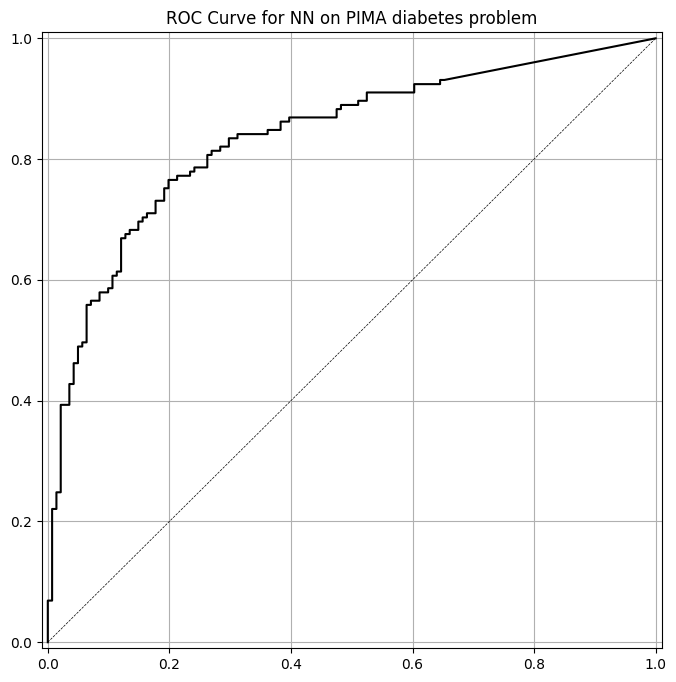

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_testB,y_pred_class_nn_B)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_testB,y_pred_prob_nn_B)))

plot_roc(y_testB, y_pred_prob_nn_B, 'NN')

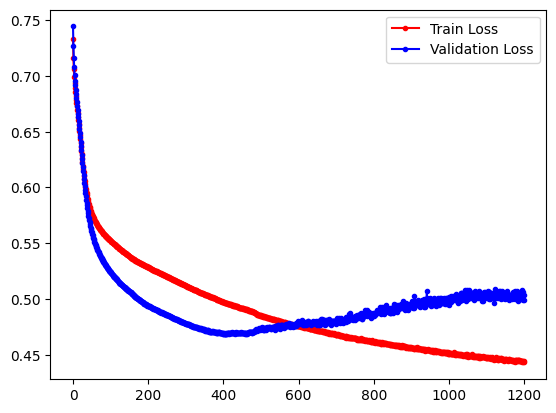

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_B.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_B.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

#### Conclusion

I learned about how different choices in neural network strcutures, learning rates, and epochs can affet the model's performance. Like changing the number of layers and nodes can influence the model's capacity to learn complex patterns from the data. Adjusting too the learning rate can impact the speed and quality of convergence during training. And modifying the number of epochs can affect the amount of training time and the model's ability to generalize.